# Comparing CA3 and CA1 Neuron Electrophysiology


## Team Member Names & Contributions
*Feel free to name your team, but please also include your real names and IDs here. Please specify who in your group worked on which parts of the project.*

- **Sunnie Hong**: abstract, editing code, graphs, Neuropixels data wrangling, discussion (PID A13527409)
- **Yudi Hu**: NeuroElectro data wrangling, merging two datasets, graphs (PID A13488186) 
- **Lauren Hui**: abstract, background, editing code (troubleshooting graphs), discussion/conclusion, Neuropixels data wrangling (PID A14697567)


## Abstract

We compared CA3 and CA1 neurons in the hippocampus based on three electrophysiological properties - firing rate, spike amplitude, and spike half-width - to examine whether these two types of neurons were similar or different in terms of their electrophysiological activity. CA3 and CA1 neurons form an essential part of the perforant pathway, which is related to long-term memory encoding and learning, and we hypothesized that their electrophysiological properties are similar because CA3 neurons feed to CA1 in the circuit. Using open-source data from NeuroElectro and Neuropixels, we were able to visualize and extract similar means and medians for these three electrophysiological properties, but due to the limited amount of data available, the results were inconclusive and were not statistically significant. The results suggest that CA3 and CA1 neurons have similar values for all three electrophysiological properties, but wide variation exists between recordings that reduce the reliability of these results. Additional recording data is required to confirm these preliminary findings.

## Research Question

How does the electrophysiology of CA3 neurons compare to that of CA1 neurons in the hippocampus?

* Is the firing rate similar?
* Is the spike half-width similar?
* Are waveform amplitude and spike amplitude comparable?

# Background and Prior Work

The hippocampus is home to a host of important functions such as learning and memory, and its ability to serve these vital functions is dependent on its circuitry. The perforant pathway, which originates in the entorhinal cortex and terminates on granule cells in the dentate gyrus, is the major afferent pathway to the hippocampus. Fibers project from the entorhinal cortex to the CA3 region, which in turn project to the CA1 region. From past experiments, CA3 stimulation resulted in similar recordings in CA1 neurons, but the recordings differed compared to those from perforant pathway stimulation (Doller et al. 1982). This difference suggests that the origin of stimulation has an effect on activity of the CA1 region. Following activation of this circuit, depolarization of the CA3 neurons caused a smaller depolarization in the CA1 neuron as observed in later experiments (Ferrea et al. 2012). 

Because of the complexity of CA3 projections to the CA1 cells, we would like to examine the differences and similarities in CA3 and CA1 electrophysiology. The CA3/CA1 hippocampal circuit was of interest to us because alterations to this pathway may have a profound effect on learning and memory. Examining the activity of CA3 and CA1 action potentials will help us gain a better understanding of how CA3 and CA1 interactions influence circuit functionality.

For this project, we used data sets from NeuroElectro and Neuropixels to compare electrophysiology data. NeuroElectro contains open source electrophysiological data from a variety of cell types including CA1 and CA3, and includes data such as resting membrane potential, spike half width, and more. Neuropixels is another open source probe and control system that contains data recorded from large regions of animal brains and includes electrophysiological data such as firing rate, duration, amplitude, and more. The main difference between these data sets is whether the recordings are made intracellularly or extracellularly: NeuroElectro data is recorded intracellularly whereas Neuropixels is recorded extracellularly. This may cause variation when examining the values for the electrophysiological properties because extracellular recording is a summation of the recordings from multiple cells, whereas intracellular recording is from an individual cell. It is also important to note that extracellular data may not be as accurate in terms of identifying which cells they are recording from since it is recorded over an area of a group of cells rather than a single identified type of cell. This project will aim to merge these datasets and examine the differences between them as well as compare the CA3 and CA1 data from these sources.

This project is concerned with three electrophysiological property data from CA3 and CA1 neurons: spike amplitude, spike half-width, and firing rate. Spike amplitude is the difference in voltage between the threshold voltage and the peak of an action potential. Spike half-width is the time it takes for an action potential to travel from half its maximum amplitude on the upstroke to the same half maximum amplitude on the downstroke. Firing rate is the number of action potential spikes per set amount of time, also known as the frequency of action potential firing. These three properties are used to understand the functionality of neurons, as firing rate encodes the intensity of a stimulus, spike half-width is related to the speed of the action potential activation in the neuron, and spike amplitude is related to the strength of the stimuli the neuron receives. These three electrophysiological properties are a good representation of how different neurons interact and what their properties are. Differing electrophysiological properties are directly related to the intrinsic qualities and features of the neuron and we are able to examine if CA3 and CA1 have similar or different electrophysiological properties related to their circuitry and role in learning and memory.


### References (include links):
Doller, Herbert J., et al. “Perforant Pathway Activation of Hippocampal CA1 Stratum Pyramidale Neurons: Electrophysiological Evidence for a Direct Pathway.” Brain Research, Elsevier, 7 Mar. 2003. https://www.ncbi.nlm.nih.gov/pubmed/7074352

Ferrea, et al. “Large-Scale, High-Resolution Electrophysiological Imaging of Field Potentials in Brain Slices with Microelectronic Multielectrode Arrays.” Frontiers, Frontiers, 17 Oct. 2012. https://www.frontiersin.org/articles/10.3389/fncir.2012.00080/full

Sayer, Rod J., et al. “The Time Course and Amplitude of EPSPs Evoked at Synapses Between Pairs of CA3/CA1 Neurons in the Hippocampal Slice.” The Journal of Neuroscience, vol. 10, no. 3, Mar. 1990, pp. 826–836. https://www.jneurosci.org/content/jneuro/10/3/826.full.pdf


## Hypothesis


We hypothesized that the electrophysiological properties of spike half width, spike amplitude, and firing rate will be similar between CA3 and CA1 cell types because CA3 neurons send inputs to CA1 in the hippocampal circuitry.

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Data Wrangling

The file “neurophysiology_data.xlsx” was downloaded from NeuroElectro and was imported as a pandas DataFrame in Python. Hippocampal CA3 and CA1 neurons electrophysiology data were extracted from the original DataFrame and two separate DataFrames containing interested electrophysiology data of CA3 and CA1 cells were created. 

The Neuropixels Cache was imported into Python from the Allen Brain Institute EcephysProjectCache. Sessions of recordings were obtained and sorted into lists for CA1 and CA3. A new DataFrame was made containing columns from CA1 and CA3 with the electrophysiological properties we were examining (amplitude, half width, and firing rate) and sorted by session ID. 


In [3]:
#Import the NeuroElectro Data
df = pd.read_excel ('neurophysiology_data.xlsx')
mouse_df = pd.DataFrame (df)
mouse_df

#pull out all the rows where "CA3" is in the NeuroType column and create a new DataFrame 
df_CA3 = df[df['NeuronType'].str.contains('CA3')].reset_index(drop=True)
df_CA3

#did the same thing for CA1 cells 
df_CA1 = df[df['NeuronType'].str.contains('CA1')].reset_index(drop=True)
df_CA1

#get all the columns of df_CA3 with ephys we are interested in
print(df_CA3[['FiringFrequency','SpikeHalfWidth','SpikeAmplitude']])

#did the same thing for df_CA1
print(df_CA1[['FiringFrequency','SpikeHalfWidth','SpikeAmplitude']])

    FiringFrequency  SpikeHalfWidth  SpikeAmplitude
0               NaN            0.54             NaN
1               NaN            0.84             NaN
2               NaN            1.70            85.0
3               NaN            0.79             NaN
4               NaN            1.70            80.0
5             118.0             NaN            74.5
6               NaN            0.55            92.2
7               NaN            1.30            73.9
8               NaN            1.18             NaN
9               NaN             NaN             NaN
10              NaN            1.10            76.0
11              NaN            0.57             NaN
    FiringFrequency  SpikeHalfWidth  SpikeAmplitude
0               NaN            0.40             NaN
1               NaN             NaN             NaN
2               NaN             NaN             NaN
3               NaN            0.67             NaN
4             206.0             NaN             NaN
5           

In [ ]:
# Import the Neuropixels Cache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# We have all of this data on the datahub! This is where it lives.
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

# Create the EcephysProjectCache object
cache = EcephysProjectCache.fixed(manifest=manifest_path)

# Get the sessions available in this dataset
sessions = cache.get_session_table()

# Create a session list for CA1 based on some criteria from Neuropixels

session_ca1_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA1' in structure_list:
        session_ca1_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_ca1_list))+' sessions that meet this criteria:')
print(session_ca1_list)

# Create a session list for CA3 based on criteria from Neuropixels

session_ca3_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA3' in structure_list:
        session_ca3_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_ca3_list))+' sessions that meet this criteria:')
print(session_ca3_list)
        
# Get session data for only the columns of ephys properties we are interested in
    
session = cache.get_session_data(session_ca3_list[0])
allen_ca3 = session.units[session.units.ecephys_structure_acronym=='CA3']
allen_ca3_amplitude = allen_ca3['waveform_amplitude']
allen_ca3_half_width = allen_ca3['waveform_halfwidth']
allen_ca3_firing_rate = allen_ca3['firing_rate']

session_a = cache.get_session_data(session_ca1_list[0])
allen_ca1 = session_a.units[session.units.ecephys_structure_acronym == 'CA1']
allen_ca1_amplitude = allen_ca1['waveform_amplitude']
allen_ca1_half_width = allen_ca1['waveform_halfwidth']
allen_ca1_firing_rate = allen_ca1['firing_rate']

print(allen_ca1_firing_rate.head)

## Data Analysis & Results

Separate dataframes for spike half width, spike amplitude, and firing rate were created for both CA3 and CA1 neuron data, resulting in 6 total dataframes. The three electrophysiology properties were compared in relation to cell type: CA3 vs CA1. Boxplots were created for each electrophysiology property in which the CA3 and CA1 data were compared. 

From the boxplot comparing spike half width between CA3 and CA1 neurons, it was determined that the median for CA1 neurons was 0.83 while that for CA3 neurons was 0.97. A rank-sums test was performed to compare dependent samples from non-normal populations, with a p-value of 0.263. The boxplot comparing the spike amplitude between CA3 and CA1 neurons indicated that the median for CA3 neurons was 78.0 mV and that for CA1 neurons was 82.6 mV. A rank-sums test for these two datasets resulted in a p-value of 0.504. Another boxplot was created to compare CA3 and CA1 data for firing frequency, in which the median for CA3 data was 118.0 Hz and the median for CA1 data was 86.0 Hz. A rank-sums test comparing CA3 and CA1 firing frequency datasets resulted in a p-value of 0.449. 


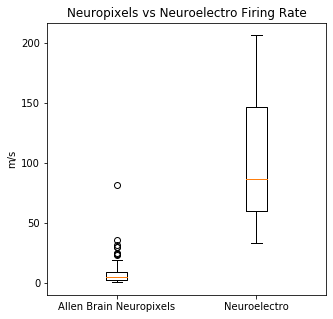

In [5]:
#FIRING RATE BOX PLOT FOR CA1
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_firing_rate, df_CA1['FiringFrequency'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Firing Rate')
plt.show()

In [6]:
print('Number of Neuropixels data points = ' + str(len(allen_ca1_firing_rate)))
print('Number of Neuroelectro data points = ' + str(len(df_CA1['FiringFrequency'].dropna())))

Number of Neuropixels data points = 145
Number of Neuroelectro data points = 3


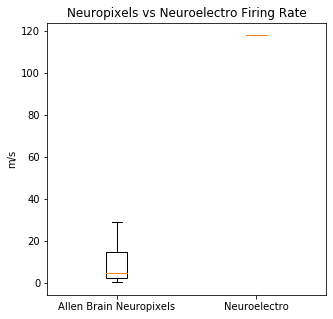

In [7]:
#FIRING RATE FOR CA3
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_firing_rate, df_CA3['FiringFrequency'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Firing Rate')
plt.show()

In [8]:
print('Number of Neuropixels data points = ' + str(len(allen_ca3_firing_rate)))
print('Number of Neuroelectro data points = ' + str(len(df_CA3['FiringFrequency'].dropna())))

Number of Neuropixels data points = 14
Number of Neuroelectro data points = 1


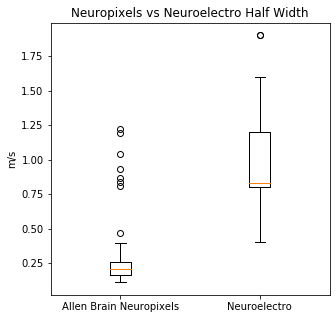

In [9]:
#SPIKE WIDTH BOX PLOT FOR CA1
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_half_width, df_CA1['SpikeHalfWidth'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Half Width')
plt.show()

In [10]:
print('Number of Neuropixels data points = ' + str(len(allen_ca1_half_width)))
print('Number of Neuroelectro data points = ' + str(len(df_CA1['SpikeHalfWidth'].dropna())))

Number of Neuropixels data points = 145
Number of Neuroelectro data points = 17


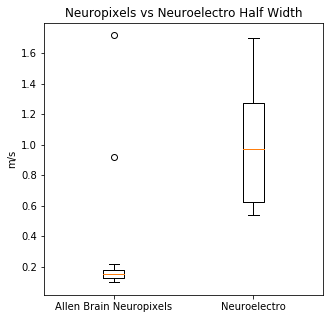

In [11]:
#BOXPLOT FOR SPIKE HALF WIDTH FOR CA3
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_half_width.dropna(), df_CA3['SpikeHalfWidth'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Half Width')
plt.show()

In [12]:
print('Number of Neuropixels data points = ' + str(len(allen_ca3_half_width)))
print('Number of Neuroelectro data points = ' + str(len(df_CA3['SpikeHalfWidth'].dropna())))

Number of Neuropixels data points = 14
Number of Neuroelectro data points = 10


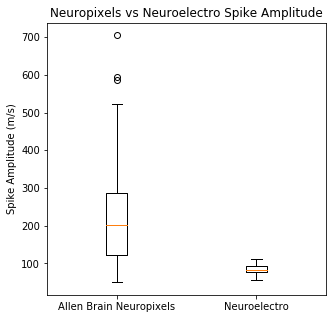

In [13]:
#BOXPLOT FOR SPIKE AMPLITUDE FOR CA1
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_amplitude.dropna(), df_CA1['SpikeAmplitude'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('Spike Amplitude (m/s)')
ax.set_title('Neuropixels vs Neuroelectro Spike Amplitude')
ax.annotate
plt.show()

In [14]:
print('Number of Neuropixels data points = ' + str(len(allen_ca1_amplitude)))
print('Number of Neuroelectro data points = ' + str(len(df_CA1['SpikeAmplitude'].dropna())))

Number of Neuropixels data points = 145
Number of Neuroelectro data points = 13


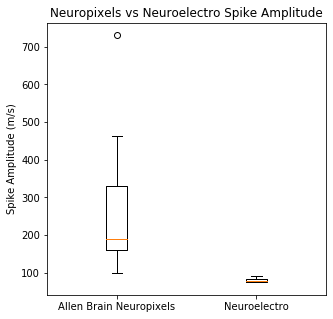

In [15]:
#BOXPLOT FOR SPIKE AMPLITUDE FOR CA3
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_amplitude.dropna(), df_CA3['SpikeAmplitude'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('Spike Amplitude (m/s)')
ax.set_title('Neuropixels vs Neuroelectro Spike Amplitude')
plt.show()

In [16]:
print('Number of Neuropixels data points = ' + str(len(allen_ca3_amplitude)))
print('Number of Neuroelectro data points = ' + str(len(df_CA3['SpikeAmplitude'].dropna())))

Number of Neuropixels data points = 14
Number of Neuroelectro data points = 6


In [17]:
frame = [allen_ca1_firing_rate, df_CA1['FiringFrequency'].dropna()]
df_result_CA1_firing_rate = pd.concat(frame)
df_result_CA1_firing_rate

frame = [allen_ca3_firing_rate, df_CA3['FiringFrequency'].dropna()]
df_result_CA3_firing_rate = pd.concat(frame)
df_result_CA3_firing_rate

#merge NeuroPixels and Neuroelectro CA1 and CA3 spike half width data 
frame = [allen_ca1_half_width, df_CA1['SpikeHalfWidth'].dropna()]
df_result_CA1_half_width = pd.concat(frame)
df_result_CA1_half_width

frame = [allen_ca3_half_width, df_CA3['SpikeHalfWidth'].dropna()]
df_result_CA3_half_width = pd.concat(frame)
df_result_CA3_half_width

frame = [allen_ca1_amplitude, df_CA1['SpikeAmplitude'].dropna()]
df_result_CA1_amplitude = pd.concat(frame)
df_result_CA1_amplitude

frame = [allen_ca3_amplitude, df_CA3['SpikeAmplitude'].dropna()]
df_result_CA3_amplitude = pd.concat(frame)
df_result_CA3_amplitude

950936572     97.998030
950936639    193.194690
950936710    151.189350
950936675    253.296225
950936656    389.819040
950936759    187.906485
950936870    343.088850
950936855    290.611620
950936727    461.618820
950936941    181.784655
950936979    730.104375
950936908    144.401790
950936992    186.037020
950937050    150.797595
2             85.000000
4             80.000000
5             74.500000
6             92.200000
7             73.900000
10            76.000000
dtype: float64

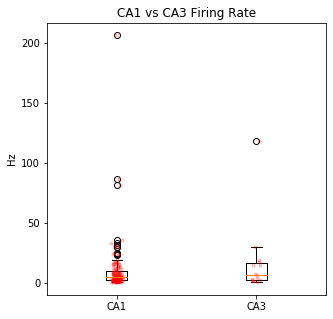

In [18]:
#boxplot for CA1 and CA3 firing rate data 
fig,ax = plt.subplots(figsize=(5,5))
data = [df_result_CA1_firing_rate, df_result_CA3_firing_rate]
plt.boxplot(data)
for i in [1,2]:
    y = data[i-1]
    x = np.random.normal(i, 0.02, len(y))
    plt.plot(x, y, 'r.', alpha=0.2)
ax.set_xticklabels(['CA1','CA3'])
ax.set_ylabel('Hz')
ax.set_title('CA1 vs CA3 Firing Rate')
plt.show()

In [19]:
print('Number of CA1 data points = ' + str(len(df_result_CA1_firing_rate)))
print('Number of CA3 data points = ' + str(len(df_result_CA3_firing_rate)))

Number of CA1 data points = 148
Number of CA3 data points = 15


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


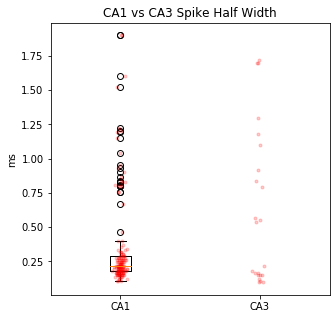

In [20]:
#boxplot for CA1 and CA3 spike half width data 
fig,ax = plt.subplots(figsize=(5,5))
data = [df_result_CA1_half_width, df_result_CA3_half_width]
plt.boxplot(data)
for i in [1,2]:
    y = data[i-1]
    x = np.random.normal(i, 0.02, len(y))
    plt.plot(x, y, 'r.', alpha=0.2)
ax.set_xticklabels(['CA1','CA3'])
ax.set_ylabel('ms')
ax.set_title('CA1 vs CA3 Spike Half Width')
plt.show()

In [21]:
print('Number of CA1 data points = ' + str(len(df_result_CA1_half_width)))
print('Number of CA3 data points = ' + str(len(df_result_CA3_half_width)))

Number of CA1 data points = 162
Number of CA3 data points = 24


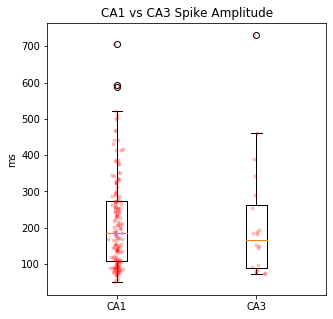

In [22]:
#boxplot for CA1 and CA3 spike amplitude data 
fig,ax = plt.subplots(figsize=(5,5))
data = [df_result_CA1_amplitude, df_result_CA3_amplitude]
plt.boxplot(data)
for i in [1,2]:
    y = data[i-1]
    x = np.random.normal(i, 0.02, len(y))
    plt.plot(x, y, 'r.', alpha=0.2)
ax.set_xticklabels(['CA1','CA3'])
ax.set_ylabel('ms')
ax.set_title('CA1 vs CA3 Spike Amplitude')
plt.show()

In [23]:
print('Number of CA1 data points = ' + str(len(df_result_CA1_amplitude)))
print('Number of CA3 data points = ' + str(len(df_result_CA3_amplitude)))

Number of CA1 data points = 158
Number of CA3 data points = 20


In [24]:
from scipy import stats
print(stats.describe(df_CA1['SpikeHalfWidth'].dropna()))
print(stats.describe(df_CA3['SpikeHalfWidth'].dropna()))
print(stats.describe(df_CA1['FiringFrequency'].dropna()))
print(stats.describe(df_CA3['FiringFrequency'].dropna()))
print(stats.describe(df_CA1['SpikeAmplitude'].dropna()))
print(stats.describe(df_CA3['SpikeAmplitude'].dropna()))

DescribeResult(nobs=17, minmax=(0.4, 1.9), mean=1.0452941176470587, variance=0.1907764705882353, skewness=0.8466614489741058, kurtosis=-0.3805757644850307)
DescribeResult(nobs=10, minmax=(0.54, 1.7), mean=1.0270000000000001, variance=0.19708999999999996, skewness=0.3943833909947903, kurtosis=-1.1806692296973336)
DescribeResult(nobs=3, minmax=(33.2, 206.0), mean=108.39999999999999, variance=7841.28, skewness=0.4349828375463192, kurtosis=-1.4999999999999996)
DescribeResult(nobs=1, minmax=(118.0, 118.0), mean=118.0, variance=nan, skewness=0.0, kurtosis=-3.0)
DescribeResult(nobs=13, minmax=(56.0, 112.0), mean=83.14307692307692, variance=273.7930730769231, skewness=0.004994652097478402, kurtosis=-0.5579066505129573)
DescribeResult(nobs=6, minmax=(73.9, 92.2), mean=80.26666666666667, variance=51.37466666666667, skewness=0.7603035444467767, kurtosis=-0.8302627471344834)


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
print(stats.ranksums(df_result_CA1_firing_rate, df_result_CA3_firing_rate))
print(stats.ranksums(df_result_CA1_half_width, df_result_CA3_half_width))
print(stats.ranksums(df_result_CA1_amplitude, df_result_CA3_amplitude))

RanksumsResult(statistic=-0.7578201399641389, pvalue=0.44855866380054144)
RanksumsResult(statistic=-1.1192530713723583, pvalue=0.26303219012016477)
RanksumsResult(statistic=0.6678648215342755, pvalue=0.5042198845577079)


In [26]:
print(np.median(df_CA1['SpikeHalfWidth'].dropna()))
print(np.median(df_CA3['SpikeHalfWidth'].dropna()))
print(np.median(df_CA1['FiringFrequency'].dropna()))
print(np.median(df_CA3['FiringFrequency'].dropna()))
print(np.median(df_CA1['SpikeAmplitude'].dropna()))
print(np.median(df_CA3['SpikeAmplitude'].dropna()))

0.83
0.97
86.0
118.0
82.6
78.0


In [27]:
ca3_sessions = sessions[(['CA3' in acronyms for acronyms in sessions.ecephys_structure_acronyms])]
ca3_sessions = ca3_sessions[(['CA1' not in acronyms for acronyms in ca3_sessions.ecephys_structure_acronyms])]
ca1_sessions = sessions[(['CA1' in acronyms for acronyms in sessions.ecephys_structure_acronyms])]
ca1_sessions = ca1_sessions[(['CA3' not in acronyms for acronyms in ca1_sessions.ecephys_structure_acronyms])]
comb_sessions = sessions[(['CA3' and 'CA1' in acronyms for acronyms in sessions.ecephys_structure_acronyms])]
print("There are " + str(len(ca3_sessions)) + " unique CA3 sessions in Neuropixels.")
print("There are " + str(len(ca1_sessions)) + " unique CA1 sessions in Neuropixels.")
print("There are " + str(len(comb_sessions)) + " sessions that contain both CA1 and CA3 recordings in Neuropixels.")

There are 0 unique CA3 sessions in Neuropixels.
There are 2 unique CA1 sessions in Neuropixels.
There are 52 sessions that contain both CA1 and CA3 recordings in Neuropixels.


In [28]:
#stats for neuroelectro and allen firing rates ca3 and ca1 individually to determine intra vs extra differences
print(stats.describe(allen_ca1_firing_rate))
print(stats.describe(df_CA1['FiringFrequency'].dropna()))
print(stats.describe(allen_ca3_firing_rate))
print(stats.describe(df_CA3['FiringFrequency'].dropna()))

DescribeResult(nobs=145, minmax=(0.102523817602014, 81.7015463997864), mean=7.275172183375632, variance=86.23862238276374, skewness=4.250489798409665, kurtosis=27.694442897272676)
DescribeResult(nobs=3, minmax=(33.2, 206.0), mean=108.39999999999999, variance=7841.28, skewness=0.4349828375463192, kurtosis=-1.4999999999999996)
DescribeResult(nobs=14, minmax=(0.309688581830122, 29.2632335146168), mean=8.715714451113053, variance=76.43595754813171, skewness=1.0103401916279207, kurtosis=0.009138094874939107)
DescribeResult(nobs=1, minmax=(118.0, 118.0), mean=118.0, variance=nan, skewness=0.0, kurtosis=-3.0)


In [29]:
#stats for neuroelectro and allen half widths ca3 and ca1 individually to determine intra vs extra differences
print(stats.describe(allen_ca1_half_width))
print(stats.describe(df_CA1['SpikeHalfWidth'].dropna()))
print(stats.describe(allen_ca3_half_width))
print(stats.describe(df_CA3['SpikeHalfWidth'].dropna()))

DescribeResult(nobs=145, minmax=(0.109882747068677, 1.22244556113903), mean=0.25026742909952054, variance=0.032573842802689094, skewness=3.7443826316678277, kurtosis=14.625889553018734)
DescribeResult(nobs=17, minmax=(0.4, 1.9), mean=1.0452941176470587, variance=0.1907764705882353, skewness=0.8466614489741058, kurtosis=-0.3805757644850307)
DescribeResult(nobs=14, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
DescribeResult(nobs=10, minmax=(0.54, 1.7), mean=1.0270000000000001, variance=0.19708999999999996, skewness=0.3943833909947903, kurtosis=-1.1806692296973336)


In [30]:
#stats for neuroelectro and allen spike amplitudes ca3 and ca1 individually to determine intra vs extra differences
print(stats.describe(allen_ca1_amplitude.dropna()))
print(stats.describe(df_CA1['SpikeAmplitude'].dropna()))
print(stats.describe(allen_ca3_amplitude.dropna()))
print(stats.describe(df_CA3['SpikeAmplitude'].dropna()))

DescribeResult(nobs=145, minmax=(49.34397, 704.97297), mean=225.32777710344828, variance=16051.637455394857, skewness=1.0817658717358247, kurtosis=1.0597470454554587)
DescribeResult(nobs=13, minmax=(56.0, 112.0), mean=83.14307692307692, variance=273.7930730769231, skewness=0.004994652097478402, kurtosis=-0.5579066505129573)
DescribeResult(nobs=14, minmax=(97.9980299999999, 730.104375), mean=268.7034675, variance=28457.50871873959, skewness=1.5841366742465814, kurtosis=1.9719072940247493)
DescribeResult(nobs=6, minmax=(73.9, 92.2), mean=80.26666666666667, variance=51.37466666666667, skewness=0.7603035444467767, kurtosis=-0.8302627471344834)


In [31]:
#stats for individual CA1 and CA3 combined data sets for firing frequency
print(stats.ranksums(allen_ca1_firing_rate, df_CA1['FiringFrequency'].dropna()))
print(stats.ranksums(allen_ca3_firing_rate, df_CA3['FiringFrequency'].dropna()))

RanksumsResult(statistic=-2.9322441926883016, pvalue=0.003365220285786965)
RanksumsResult(statistic=-1.6201851746019649, pvalue=0.10519250512004145)


In [32]:
#stats for individual CA1 and CA3 combined data sets for spike half width
print(stats.ranksums(allen_ca1_half_width, df_CA1['SpikeHalfWidth'].dropna()))
print(stats.ranksums(allen_ca3_half_width, df_CA3['SpikeHalfWidth'].dropna()))

RanksumsResult(statistic=-6.342106107941887, pvalue=2.266451202563519e-10)
RanksumsResult(statistic=-2.6349301969610393, pvalue=0.008415458738002157)


In [33]:
#stats for individual CA1 and CA3 combined data sets for spike amplitude
print(stats.ranksums(allen_ca1_amplitude.dropna(), df_CA1['SpikeAmplitude'].dropna()))
print(stats.ranksums(allen_ca3_amplitude.dropna(), df_CA3['SpikeAmplitude'].dropna()))

RanksumsResult(statistic=4.995609903945341, pvalue=5.865011054286026e-07)
RanksumsResult(statistic=3.464101615137755, pvalue=0.0005320055051392492)


## Conclusion & Discussion

hello it's me